In [12]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json

In [13]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = "metric"

# Build partial query URL
params = {
    'appid': api_key,
    'units': units
}

In [14]:
weather_data = []
cities = ["Paris","London","Oslo","Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    params['q'] = city
    response = req.get(endpoint, params=params).json()
    weather_data.append(response)

weather_data

[{'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 48.85, 'lon': 2.35},
  'dt': 1512232200,
  'id': 2988507,
  'main': {'humidity': 92,
   'pressure': 1027,
   'temp': -0.57,
   'temp_max': 1,
   'temp_min': -2},
  'name': 'Paris',
  'sys': {'country': 'FR',
   'id': 5617,
   'message': 0.2569,
   'sunrise': 1512199492,
   'sunset': 1512230134,
   'type': 1},
  'visibility': 4300,
  'weather': [{'description': 'mist',
    'icon': '50n',
    'id': 701,
    'main': 'Mist'}],
  'wind': {'deg': 340, 'speed': 2.1}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 51.51, 'lon': -0.13},
  'dt': 1512233400,
  'id': 2643743,
  'main': {'humidity': 81,
   'pressure': 1026,
   'temp': 4.99,
   'temp_max': 6,
   'temp_min': 4},
  'name': 'London',
  'sys': {'country': 'GB',
   'id': 5091,
   'message': 0.0059,
   'sunrise': 1512200781,
   'sunset': 1512230034,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'haze',
  

In [15]:
# Extract interesting data from responses
lat_data = [data.get("coord").get("lat") for data in weather_data]
temp_data = [data.get("main").get("temp") for data in weather_data]

weather_data = {"temp": temp_data, "lat": lat_data}
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,lat,temp
0,48.85,-0.57
1,51.51,4.99
2,59.91,-2.00
3,39.91,-5.00


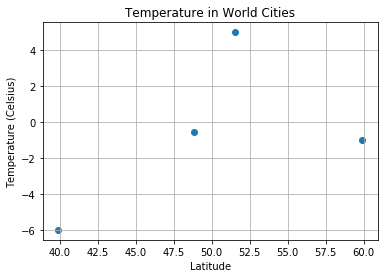

In [5]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()